In [1]:
# !pip install matplotlib seaborn

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = "data"
matches_file = os.path.join(data_dir, "matches.csv")
quaTeams_file = os.path.join(data_dir, "qualified.csv")
teams_file = os.path.join(data_dir, "teams.csv")


In [4]:
matches_data = pd.read_csv(matches_file)
qualified_teams = pd.read_csv(quaTeams_file)
teams_data = pd.read_csv(teams_file)

In [5]:
matches_data.head()

,date,team1,team1Text,team2,team2Text,venue,IdCupSeason,CupName,team1Score,team2Score,statText,resText,team1PenScore,team2PenScore
0,19500308,WAL,Wales,NIR,Northern Ireland,"Cardiff, Wales",6,FIFA competition team qualification,0.0,0.0,NaN,0-0,NaN,NaN
1,19500402,ESP,Spain,POR,Portugal,"Madrid, Spain",6,FIFA competition team qualification,5.0,1.0,NaN,5-1,NaN,NaN
2,19500409,POR,Portugal,ESP,Spain,"Lisbon, Portugal",6,FIFA competition team qualification,2.0,2.0,NaN,2-2,NaN,NaN
3,19500415,SCO,Scotland,ENG,England,"Glasgow, Scotland",6,FIFA competition team qualification,0.0,1.0,NaN,0-1,NaN,NaN
4,19500624,BRA,Brazil,MEX,Mexico,"Rio De Janeiro, Brazil",7,FIFA competition team final,4.0,0.0,NaN,4-0,NaN,NaN


In [6]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31833 entries, 0 to 31832
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           31833 non-null  int64  
 1   team1          31833 non-null  object 
 2   team1Text      31833 non-null  object 
 3   team2          31833 non-null  object 
 4   team2Text      31833 non-null  object 
 5   venue          31770 non-null  object 
 6   IdCupSeason    31833 non-null  int64  
 7   CupName        31833 non-null  object 
 8   team1Score     31820 non-null  float64
 9   team2Score     31820 non-null  float64
 10  statText       484 non-null    object 
 11  resText        31460 non-null  object 
 12  team1PenScore  484 non-null    float64
 13  team2PenScore  484 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 3.4+ MB


In [7]:
matches_data.describe()

,date,IdCupSeason,team1Score,team2Score,team1PenScore,team2PenScore
count,3.183300e+04,3.183300e+04,31820.000000,31820.000000,484.000000,484.000000
mean,1.993968e+07,1.163112e+09,1.682055,1.101351,4.010331,3.803719
std,1.669679e+05,9.865917e+08,1.640383,1.300411,1.681065,1.837246
min,1.950022e+07,6.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.983081e+07,7.761000e+03,1.000000,0.000000,3.000000,3.000000
50%,1.998021e+07,2.000010e+09,1.000000,1.000000,4.000000,4.000000
75%,2.007102e+07,2.000010e+09,2.000000,2.000000,5.000000,5.000000
max,2.017123e+07,2.000010e+09,31.000000,22.000000,13.000000,12.000000


In [8]:
display(matches_data['team1'].value_counts())
display(matches_data['team2'].value_counts())

team1
KOR    575
BRA    549
MEX    509
THA    482
USA    424
      ... 
TCA      5
GIB      5
MSR      5
YMD      3
TUV      2
Name: count, Length: 225, dtype: int64

team2
KOR    421
BRA    399
URU    388
PAR    385
MEX    373
      ... 
MSR      5
GBR      4
SAA      3
TWN      3
TUV      2
Name: count, Length: 226, dtype: int64

In [9]:
matches_data['date'] = pd.to_datetime(matches_data['date'], format='%Y%m%d' , errors='coerce')

In [10]:
matches_data[(matches_data['team1Text'] == 'Portugal') | (matches_data['team2Text'] == 'Portugal')]

,date,team1,team1Text,team2,team2Text,venue,IdCupSeason,CupName,team1Score,team2Score,statText,resText,team1PenScore,team2PenScore
1,1950-04-02,ESP,Spain,POR,Portugal,"Madrid, Spain",6,FIFA competition team qualification,5.0,1.0,NaN,5-1,NaN,NaN
2,1950-04-09,POR,Portugal,ESP,Spain,"Lisbon, Portugal",6,FIFA competition team qualification,2.0,2.0,NaN,2-2,NaN,NaN
59,1950-05-14,POR,Portugal,ENG,England,"Lisbon, Portugal",2000010101,Friendly,3.0,5.0,NaN,3-5,NaN,NaN
66,1950-05-21,POR,Portugal,SCO,Scotland,"Lisbon, Portugal",2000010101,Friendly,2.0,2.0,NaN,2-2,NaN,NaN
133,1951-04-08,POR,Portugal,ITA,Italy,"Lisbon, Portugal",2000010101,Friendly,1.0,4.0,NaN,1-4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31369,2017-10-10,POR,Portugal,SUI,Switzerland,"Lisbon, Portugal",276481,FIFA competition team qualification,2.0,0.0,NaN,2-0,NaN,NaN
31454,2017-03-28,POR,Portugal,SWE,Sweden,"Funchal, Portugal",2000010101,Friendly,2.0,3.0,NaN,2-3,NaN,NaN
31485,2017-06-03,POR,Portugal,CYP,Cyprus,"Estoril, Brazil",2000010101,Friendly,4.0,0.0,NaN,4-0,NaN,NaN
31690,2017-11-10,POR,Portugal,KSA,Saudi Arabia,"Viseu, Portugal",2000010101,Friendly,3.0,0.0,NaN,3-0,NaN,NaN


In [11]:
matches_data.columns.to_list()

['date',
 'team1',
 'team1Text',
 'team2',
 'team2Text',
 'venue',
 'IdCupSeason',
 'CupName',
 'team1Score',
 'team2Score',
 'statText',
 'resText',
 'team1PenScore',
 'team2PenScore']

In [12]:
# matches_data['home_team'] = matches_data.apply(lambda row: row['team1Text'] if row['team1Text'] in row['venue'] else row['team2Text'] , axis=1)

In [13]:
cols_Todrop = ["team1Text", "team2Text", "statText", "resText", "IdCupSeason"]

In [14]:
matches_data.drop(columns=cols_Todrop, inplace=True)

In [15]:
matches_data.head()

,date,team1,team2,venue,CupName,team1Score,team2Score,team1PenScore,team2PenScore
0,1950-03-08,WAL,NIR,"Cardiff, Wales",FIFA competition team qualification,0.0,0.0,NaN,NaN
1,1950-04-02,ESP,POR,"Madrid, Spain",FIFA competition team qualification,5.0,1.0,NaN,NaN
2,1950-04-09,POR,ESP,"Lisbon, Portugal",FIFA competition team qualification,2.0,2.0,NaN,NaN
3,1950-04-15,SCO,ENG,"Glasgow, Scotland",FIFA competition team qualification,0.0,1.0,NaN,NaN
4,1950-06-24,BRA,MEX,"Rio De Janeiro, Brazil",FIFA competition team final,4.0,0.0,NaN,NaN


In [16]:
matches_data["team1Score"].isnull().sum()

np.int64(13)

In [17]:
matches_data["team1Score"].fillna(0, inplace=True)
matches_data["team2Score"].fillna(0, inplace=True)

/tmp/ipykernel_5703/3110994917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches_data["team1Score"].fillna(0, inplace=True)
/tmp/ipykernel_5703/3110994917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [18]:
matches_data["team1Score"] = matches_data["team1Score"].astype(int)
matches_data["team2Score"] = matches_data["team2Score"].astype(int)

In [19]:
matches_data

,date,team1,team2,venue,CupName,team1Score,team2Score,team1PenScore,team2PenScore
0,1950-03-08,WAL,NIR,"Cardiff, Wales",FIFA competition team qualification,0,0,NaN,NaN
1,1950-04-02,ESP,POR,"Madrid, Spain",FIFA competition team qualification,5,1,NaN,NaN
2,1950-04-09,POR,ESP,"Lisbon, Portugal",FIFA competition team qualification,2,2,NaN,NaN
3,1950-04-15,SCO,ENG,"Glasgow, Scotland",FIFA competition team qualification,0,1,NaN,NaN
4,1950-06-24,BRA,MEX,"Rio De Janeiro, Brazil",FIFA competition team final,4,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
31828,2017-07-20,MEX,HON,"Glendale, United States",Confederation competition team final,1,0,NaN,NaN
31829,2017-07-21,JAM,CAN,"Glendale, United States",Confederation competition team final,2,1,NaN,NaN
31830,2017-07-23,CRC,USA,"Arlington, United States",Confederation competition team final,0,2,NaN,NaN
31831,2017-07-24,MEX,JAM,"Los Angeles, United States",Confederation competition team final,0,1,NaN,NaN


In [20]:
matches_data["goals_diff"] = matches_data["team1Score"] - matches_data["team2Score"]

let's say if match result = 0 means draw and if 1 so it means team1 won and if -1 so means team2 won

In [21]:
matches_data["matches_res"] = matches_data["goals_diff"].apply(lambda x: 1 if x>0 else (-1 if x < 0 else 0))

In [22]:
matches_data.head()

,date,team1,team2,venue,CupName,team1Score,team2Score,team1PenScore,team2PenScore,goals_diff,matches_res
0,1950-03-08,WAL,NIR,"Cardiff, Wales",FIFA competition team qualification,0,0,NaN,NaN,0,0
1,1950-04-02,ESP,POR,"Madrid, Spain",FIFA competition team qualification,5,1,NaN,NaN,4,1
2,1950-04-09,POR,ESP,"Lisbon, Portugal",FIFA competition team qualification,2,2,NaN,NaN,0,0
3,1950-04-15,SCO,ENG,"Glasgow, Scotland",FIFA competition team qualification,0,1,NaN,NaN,-1,-1
4,1950-06-24,BRA,MEX,"Rio De Janeiro, Brazil",FIFA competition team final,4,0,NaN,NaN,4,1


In [23]:
matches_data[["team1PenScore", "team2PenScore"]].isnull().sum()

team1PenScore    31349
team2PenScore    31349
dtype: int64

In [24]:
matches_data["team1PenScore"] = matches_data["team1PenScore"].fillna(0).astype(int)
matches_data["team2PenScore"] = matches_data["team2PenScore"].fillna(0).astype(int)

In [25]:
matches_data

,date,team1,team2,venue,CupName,team1Score,team2Score,team1PenScore,team2PenScore,goals_diff,matches_res
0,1950-03-08,WAL,NIR,"Cardiff, Wales",FIFA competition team qualification,0,0,0,0,0,0
1,1950-04-02,ESP,POR,"Madrid, Spain",FIFA competition team qualification,5,1,0,0,4,1
2,1950-04-09,POR,ESP,"Lisbon, Portugal",FIFA competition team qualification,2,2,0,0,0,0
3,1950-04-15,SCO,ENG,"Glasgow, Scotland",FIFA competition team qualification,0,1,0,0,-1,-1
4,1950-06-24,BRA,MEX,"Rio De Janeiro, Brazil",FIFA competition team final,4,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
31828,2017-07-20,MEX,HON,"Glendale, United States",Confederation competition team final,1,0,0,0,1,1
31829,2017-07-21,JAM,CAN,"Glendale, United States",Confederation competition team final,2,1,0,0,1,1
31830,2017-07-23,CRC,USA,"Arlington, United States",Confederation competition team final,0,2,0,0,-2,-1
31831,2017-07-24,MEX,JAM,"Los Angeles, United States",Confederation competition team final,0,1,0,0,-1,-1


In [26]:
matches_data[["team1PenScore", "team2PenScore"]].isnull().sum()

team1PenScore    0
team2PenScore    0
dtype: int64

as our dataset is almost cleared but now we can add one thing to help model that when the penalties will be non zer and when it is zero

In [27]:
matches_data['penalty_occrd'] = ((matches_data['team1Score'] > 0 ) | (matches_data['team2Score'] > 0)).astype(int)

In [28]:
matches_data['venue'].isnull().sum()


np.int64(63)

In [29]:
matches_data['venue'] = matches_data['venue'].fillna('Unknown')

In [30]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31833 entries, 0 to 31832
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           31833 non-null  datetime64[ns]
 1   team1          31833 non-null  object        
 2   team2          31833 non-null  object        
 3   venue          31833 non-null  object        
 4   CupName        31833 non-null  object        
 5   team1Score     31833 non-null  int64         
 6   team2Score     31833 non-null  int64         
 7   team1PenScore  31833 non-null  int64         
 8   team2PenScore  31833 non-null  int64         
 9   goals_diff     31833 non-null  int64         
 10  matches_res    31833 non-null  int64         
 11  penalty_occrd  31833 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 2.9+ MB


In [31]:
numeric_cols = ['date', 'team1Score', 'team2Score', 'team1PenScore', 'team2PenScore', 'goals_diff', 'matches_res']

In [32]:
corr_matrix = matches_data[numeric_cols].corr()
corr_matrix

,date,team1Score,team2Score,team1PenScore,team2PenScore,goals_diff,matches_res
date,1.000000,-0.098300,-0.039152,0.039572,0.043385,-0.049461,-0.046794
team1Score,-0.098300,1.000000,-0.139463,-0.051003,-0.050856,0.816611,0.589402
team2Score,-0.039152,-0.139463,1.000000,-0.018862,-0.019688,-0.685435,-0.610905
team1PenScore,0.039572,-0.051003,-0.018862,1.000000,0.933422,-0.026509,-0.025503
team2PenScore,0.043385,-0.050856,-0.019688,0.933422,1.000000,-0.025920,-0.025022
goals_diff,-0.049461,0.816611,-0.685435,-0.026509,-0.025920,1.000000,0.789486
matches_res,-0.046794,0.589402,-0.610905,-0.025503,-0.025022,0.789486,1.000000


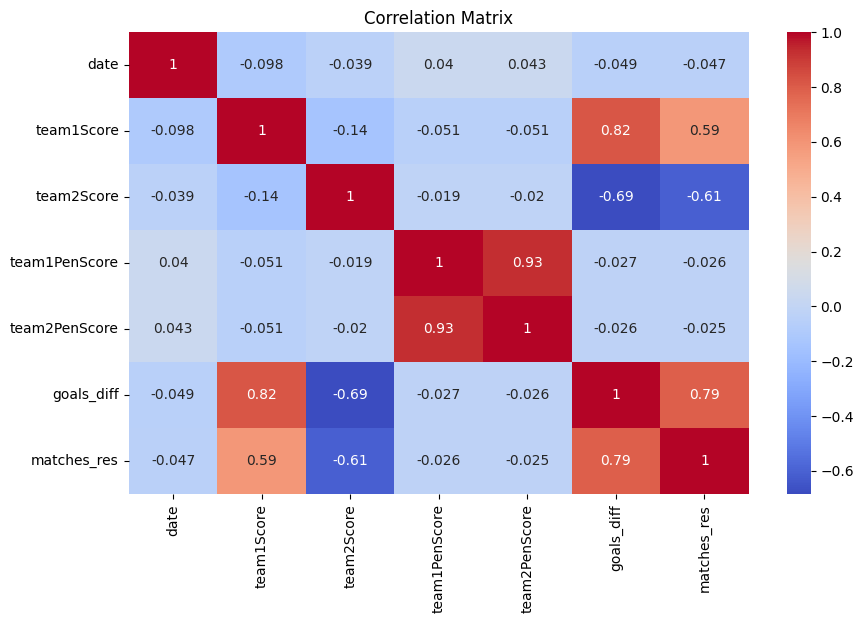

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [34]:
qualified_teams.head()


,name,draw
0,RUS,A1
1,KSA,A2
2,EGY,A3
3,URU,A4
4,POR,B1


In [35]:
teams_data.head()

,confederation,name,fifa_code,ioc_code
0,CAF,Algeria,ALG,ALG
1,CAF,Angola,ANG,ANG
2,CAF,Benin,BEN,BEN
3,CAF,Botswana,BOT,BOT
4,CAF,Burkina Faso,BFA,BUR


In [36]:
teams_data['confederation'].shape

(221,)

In [37]:
team1_counts = matches_data['team1'].unique()
team2_counts = matches_data['team2'].unique()

all_teams = set(team1_counts).union(set(team2_counts))
print("total number of teams: ", len(all_teams))

total number of teams:  226


In [38]:
to_merge = teams_data[["fifa_code", "confederation"]] 

In [39]:
matches_data = matches_data.merge(to_merge, left_on="team1", right_on="fifa_code", how="left")
matches_data = matches_data.rename(columns={"confederation": "team1_confdr"}).drop(columns=["fifa_code"])

In [40]:
matches_data = matches_data.merge(to_merge, left_on="team2", right_on="fifa_code", how="left")
matches_data = matches_data.rename(columns={"confederation": "team2_confdr"}).drop(columns=["fifa_code"])

In [41]:
matches_data.to_csv('cleaned_matches_data.csv')

In [42]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31833 entries, 0 to 31832
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           31833 non-null  datetime64[ns]
 1   team1          31833 non-null  object        
 2   team2          31833 non-null  object        
 3   venue          31833 non-null  object        
 4   CupName        31833 non-null  object        
 5   team1Score     31833 non-null  int64         
 6   team2Score     31833 non-null  int64         
 7   team1PenScore  31833 non-null  int64         
 8   team2PenScore  31833 non-null  int64         
 9   goals_diff     31833 non-null  int64         
 10  matches_res    31833 non-null  int64         
 11  penalty_occrd  31833 non-null  int64         
 12  team1_confdr   30782 non-null  object        
 13  team2_confdr   30609 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 3.4+ MB


In [43]:
matches_data['team1_confdr'].isnull().sum()

np.int64(1051)

In [44]:
missing_confdr = matches_data[matches_data['team1_confdr'].isnull() | matches_data['team2_confdr'].isnull()]
print(missing_confdr)

            date team1 team2                   venue  \
8     1950-06-25   YUG   SUI  Belo Horizonte, Brazil   
10    1950-06-28   YUG   MEX    Porto Alegre, Brazil   
14    1950-07-01   BRA   YUG  Rio De Janeiro, Brazil   
53    1950-04-30   HUN   TCH       Budapest, Hungary   
65    1950-05-21   ROU   TCH      Bucharest, Romania   
...          ...   ...   ...                     ...   
30915 2016-11-09   MNG   LAO       Kuching, Malaysia   
30927 2016-11-10   LIB   PLE         Beirut, Lebanon   
31421 2017-03-22   YEM   PLE      Al Wakrah, Morocco   
31503 2017-06-06   BHR   PLE          Riffa, Bahrain   
31650 2017-10-05   TPE   MNG     Taipei City, Taiwan   

                           CupName  team1Score  team2Score  team1PenScore  \
8      FIFA competition team final           3           0              0   
10     FIFA competition team final           4           1              0   
14     FIFA competition team final           2           0              0   
53                 

In [45]:
matches_data['team1_confdr'].fillna('Unknown', inplace=True)
matches_data['team2_confdr'].fillna('Unknown', inplace=True)

/tmp/ipykernel_5703/3980967328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches_data['team1_confdr'].fillna('Unknown', inplace=True)
/tmp/ipykernel_5703/3980967328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [46]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31833 entries, 0 to 31832
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           31833 non-null  datetime64[ns]
 1   team1          31833 non-null  object        
 2   team2          31833 non-null  object        
 3   venue          31833 non-null  object        
 4   CupName        31833 non-null  object        
 5   team1Score     31833 non-null  int64         
 6   team2Score     31833 non-null  int64         
 7   team1PenScore  31833 non-null  int64         
 8   team2PenScore  31833 non-null  int64         
 9   goals_diff     31833 non-null  int64         
 10  matches_res    31833 non-null  int64         
 11  penalty_occrd  31833 non-null  int64         
 12  team1_confdr   31833 non-null  object        
 13  team2_confdr   31833 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 3.4+ MB


In [47]:
matches_data

,date,team1,team2,venue,CupName,team1Score,team2Score,team1PenScore,team2PenScore,goals_diff,matches_res,penalty_occrd,team1_confdr,team2_confdr
0,1950-03-08,WAL,NIR,"Cardiff, Wales",FIFA competition team qualification,0,0,0,0,0,0,0,UEFA,UEFA
1,1950-04-02,ESP,POR,"Madrid, Spain",FIFA competition team qualification,5,1,0,0,4,1,1,UEFA,UEFA
2,1950-04-09,POR,ESP,"Lisbon, Portugal",FIFA competition team qualification,2,2,0,0,0,0,1,UEFA,UEFA
3,1950-04-15,SCO,ENG,"Glasgow, Scotland",FIFA competition team qualification,0,1,0,0,-1,-1,1,UEFA,UEFA
4,1950-06-24,BRA,MEX,"Rio De Janeiro, Brazil",FIFA competition team final,4,0,0,0,4,1,1,CONMEBOL,CONCACAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31828,2017-07-20,MEX,HON,"Glendale, United States",Confederation competition team final,1,0,0,0,1,1,1,CONCACAF,CONCACAF
31829,2017-07-21,JAM,CAN,"Glendale, United States",Confederation competition team final,2,1,0,0,1,1,1,CONCACAF,CONCACAF
31830,2017-07-23,CRC,USA,"Arlington, United States",Confederation competition team final,0,2,0,0,-2,-1,1,CONCACAF,CONCACAF
31831,2017-07-24,MEX,JAM,"Los Angeles, United States",Confederation competition team final,0,1,0,0,-1,-1,1,CONCACAF,CONCACAF


In [48]:
matches_data['team1_confdr'] = matches_data['team1_confdr'].astype("category").cat.codes
matches_data['team2_confdr'] = matches_data['team2_confdr'].astype("category").cat.codes
matches_data['venue'] = matches_data['venue'].astype("category").cat.codes
matches_data['CupName'] = matches_data['CupName'].astype("category").cat.codes
matches_data['team1'] = matches_data['team1'].astype("category").cat.codes
matches_data['team2'] = matches_data['team2'].astype("category").cat.codes



Now to convert our date into a more readable format for the model

In [49]:
matches_data['day'] = matches_data['date'].dt.day
matches_data['month'] = matches_data['date'].dt.month
matches_data['year'] = matches_data['date'].dt.year
matches_data.drop(columns=["date"], inplace=True)

In [50]:
matches_data

,team1,team2,venue,CupName,team1Score,team2Score,team1PenScore,team2PenScore,goals_diff,matches_res,penalty_occrd,team1_confdr,team2_confdr,day,month,year
0,218,143,297,2,0,0,0,0,0,0,0,5,5,8,3,1950
1,63,155,915,2,5,1,0,0,4,1,1,5,5,2,4,1950
2,155,63,869,2,2,2,0,0,0,0,1,5,5,9,4,1950
3,166,60,554,2,0,1,0,0,-1,-1,1,5,5,15,4,1950
4,29,124,1320,1,4,0,0,0,4,1,1,3,2,24,6,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31828,124,88,555,0,1,0,0,0,1,1,1,2,2,20,7,2017
31829,98,34,555,0,2,1,0,0,1,1,1,2,2,21,7,2017
31830,47,210,95,0,0,2,0,0,-2,-1,1,2,2,23,7,2017
31831,124,98,886,0,0,1,0,0,-1,-1,1,2,2,24,7,2017


In [51]:
matches_data.to_csv('finalmatches_data.csv')

In [52]:
matches_data.dtypes

team1            int16
team2            int16
venue            int16
CupName           int8
team1Score       int64
team2Score       int64
team1PenScore    int64
team2PenScore    int64
goals_diff       int64
matches_res      int64
penalty_occrd    int64
team1_confdr      int8
team2_confdr      int8
day              int32
month            int32
year             int32
dtype: object

now to to convert our categorical columns into numericals

In [53]:
# matches_data = pd.get_dummies(matches_data, columns=['team1', 'team2', 'venue', 'CupName', 'team1_confdr', 'team2_confdr'], drop_first=False)
# matches_data

now we will do model predictions

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [56]:
train_data = matches_data[matches_data['year'] < 2015]
test_data = matches_data[matches_data['year'] >= 2015]

In [57]:
# 3. Prepare X and y for training and testing
X_train = train_data.drop('matches_res', axis=1)
y_train = train_data['matches_res']
X_test = test_data.drop('matches_res', axis=1)
y_test = test_data['matches_res']

In [58]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [59]:
# Scale numerical features (using the training data scaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data ONLY
X_test = scaler.transform(X_test)

In [60]:
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [62]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       651
           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00      1092

    accuracy                           1.00      2324
   macro avg       1.00      1.00      1.00      2324
weighted avg       1.00      1.00      1.00      2324

Confusion Matrix:
 [[ 651    0    0]
 [   0  581    0]
 [   0    0 1092]]
